<a href="https://colab.research.google.com/github/uc2045/Hello-World/blob/master/Oct20%20WS_LC1_Hands_on_Perform_different_tasks_with_state_of_the_art_(SOTA)_transformer_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP applications with Transformers

## Leveraging Transformers Pipelines

__Here you will leverage various transformer pipelines to solve real-world problems__

Pipelines encapsulate the overall process of every NLP process:

 1. *Tokenization*: Split the initial input into multiple sub-entities with ... properties (i.e. tokens).
 2. *Inference*: Maps every tokens into a more meaningful representation.
 3. *Decoding*: Use the above representation to generate and/or extract the final output for the underlying task.

The overall API is exposed to the end-user through the `pipeline()` method with the following
structure:

```python
from transformers import pipeline

# Using default model and tokenizer for the task
pipeline("<task-name>")

# Using a user-specified model
pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```


These models are already fine-tuned models for specific tasks available in huggingface hub

___[Created By: Dipanjan (DJ)](https://www.linkedin.com/in/dipanjans/)___

### Install dependencies

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:
pd.set_option('display.max_colwidth', None)

# 1. Customer Feedback Analytics

Scenario: You are working for a retail company which stocks various products. You will try to use tranformer LLMs here to extract sentiment and emotion from customer reviews

### Load a sentiment analysis transformer model

In [ ]:
sentiment_model = pipeline('sentiment-analysis', device=0)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Load an emotion detector transformer model

In [ ]:
emotion_model = pipeline('sentiment-analysis',
                         model='SamLowe/roberta-base-go_emotions',
                         device=0)

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

## Your Turn:

Given customer reviews, do the following.

1. For each review get the sentiment and emotion using the same models
2. Store the emotion and sentiment in separate columns in the dataframe
3. Show the dataframe with all the columns
4. Create basic visuals

In [ ]:
reviews = [
    "I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price.",
    "The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown.",
    "Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand.",
    "Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment.",
    "The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.",
    "I was skeptical about the QuickCook microwave oven initially, but it has surpassed all my expectations. The multi-function features and quick heating technology are truly innovative. A must-have in every kitchen!",
    "The Prestige juicer is a disappointment. It constantly gets jammed, and cleaning it is a nightmare. I regret this purchase.",
    "I recently purchased the AquaBliss water filter, and I'm genuinely impressed! Not only was the installation straightforward, but the water tastes remarkably fresh. Highly recommended for anyone wanting pure drinking water.",
    "The SoundWave headphones are a game-changer. They fit comfortably, and the noise-cancellation feature is top-notch. I can finally enjoy my music without any interruptions.",
    "The GlamorEyes mascara is terrible. It clumps easily and doesn't provide the volume it promises. Definitely won't be repurchasing.",
    "The StreamLine smartwatch is a fantastic addition to my tech collection. It tracks my health metrics accurately, and the battery life is commendable. It's stylish and functional.",
    "I've been using the SilkSoft hair conditioner for the past two weeks, and my hair has never felt better. It's silky, tangle-free, and smells divine. Highly recommend for those with frizzy hair.",
    "The LuxeShine nail polish chips easily and doesn't last more than a day. The colors are lovely, but the quality leaves much to be desired.",
    "Tried the PowerPulse wireless earbuds, and they keep disconnecting randomly. The sound quality is also underwhelming. Not what I expected for the price.",
    "The ZoomDrive USB stick is both compact and efficient. Transferring files has never been faster, and its durable design ensures I don't have to worry about data loss.",
    "Opted for the FreshBreeze air purifier, and it has made a noticeable difference in my home. Allergies are at bay, and the air feels cleaner and fresher.",
    "The ClearVue window cleaner left streaks on my windows. I had to redo the cleaning with another product. It's more hassle than it's worth.",
    "The MegaGrill BBQ set looked sturdy online, but in reality, it's flimsy and poorly constructed. Cooking on it has been a challenge.",
    "The UrbanWalk sneakers are not only trendy but also incredibly comfortable. I've worn them for both workouts and casual outings, and they've been perfect for both.",
    "The SwiftWrite pen set is not worth the money. The ink smudges, and the pens run out way too quickly. I'll be looking for alternatives."
]

review_df = pd.DataFrame(reviews, columns=['review'])
review_df.head()

,review
0,"I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price."
1,"The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown."
2,"Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand."
3,"Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment."
4,The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.


In [ ]:
reviews = review_df['review'].values

sentiments = []
emotions = []

for review in reviews:
  sentiments.append(sentiment_model(review)[0]['label'])
  emotions.append(emotion_model(review)[0]['label'])

review_df['sentiment'] = sentiments
review_df['emotion'] = emotions

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
review_df

,review,sentiment,emotion
0,"I had high hopes for the UltraClean vacuum cleaner, but it hardly picks up any dirt. Also, the battery life is abysmal. Not worth the price.",NEGATIVE,disappointment
1,"The SunBurst solar charger was advertised as being highly efficient, but it barely charges my devices. Even under direct sunlight, it takes forever. A complete letdown.",NEGATIVE,disappointment
2,"Bought the AirLite drone, and it's not user-friendly at all. The controls are confusing, and the camera quality is mediocre at best. Wish I had gone for another brand.",NEGATIVE,confusion
3,"Bought the LumiGlow skincare serum a month ago, and the results are visible! My skin feels rejuvenated and the fine lines have reduced. Definitely worth the investment.",POSITIVE,approval
4,The TerraFit hiking boots are outstanding. They're not only durable but also provide excellent support during long treks. My feet have never felt so comfortable during hikes.,POSITIVE,admiration
5,"I was skeptical about the QuickCook microwave oven initially, but it has surpassed all my expectations. The multi-function features and quick heating technology are truly innovative. A must-have in every kitchen!",POSITIVE,admiration
6,"The Prestige juicer is a disappointment. It constantly gets jammed, and cleaning it is a nightmare. I regret this purchase.",NEGATIVE,disappointment
7,"I recently purchased the AquaBliss water filter, and I'm genuinely impressed! Not only was the installation straightforward, but the water tastes remarkably fresh. Highly recommended for anyone wanting pure drinking water.",POSITIVE,admiration
8,"The SoundWave headphones are a game-changer. They fit comfortably, and the noise-cancellation feature is top-notch. I can finally enjoy my music without any interruptions.",POSITIVE,joy
9,The GlamorEyes mascara is terrible. It clumps easily and doesn't provide the volume it promises. Definitely won't be repurchasing.,NEGATIVE,disapproval


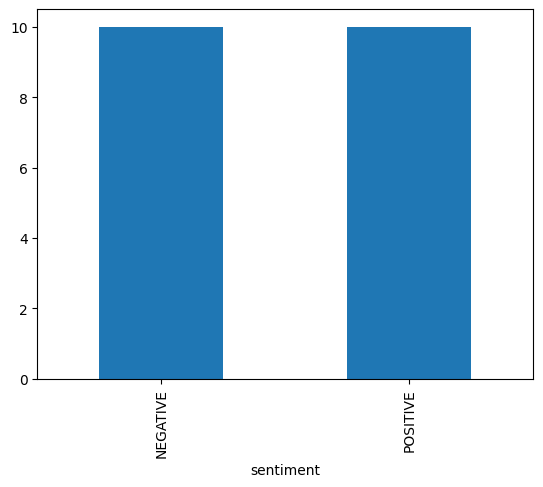

In [ ]:
review_df['sentiment'].value_counts().plot(kind='bar');

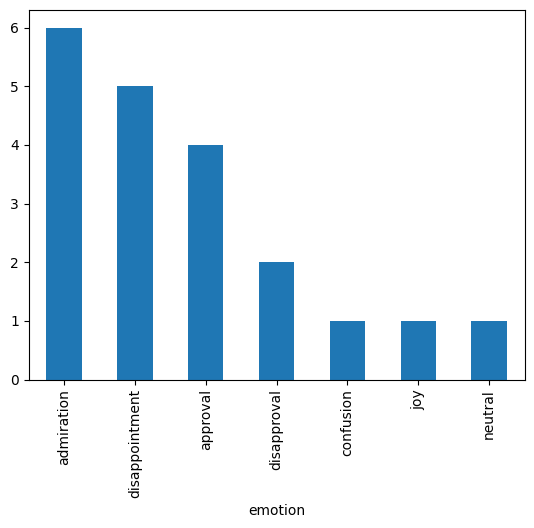

In [ ]:
review_df['emotion'].value_counts().plot(kind='bar');

# 2. Medical Report Q&A and Summary

Scenario: You are working for a healthcare company and you need to quickly create a report summary for a brain cancer report and also test the feasibility of a chatbot.

## Your Turn:

Use the models mentioned below and try Q&A and Summarization

### Question Answering

Use the model and the context report provided and ask the following questions and see what answers you get

1. What is cancer?
2. What is brain cancer?
3. What are traditional methods to detect brain cancer?
4. What is Magnetic Resonance Imaging?
5. What is biopsy?
6. What can AI do for brain cancer?
7. How can deep learning be used for brain cancer?

In [ ]:
nlp_qa = pipeline('question-answering',
                  model='deepset/roberta-base-squad2',
                  device=0)

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
context = """
Cancer Detection for the Brain: An Overview of Modern Methods and the Role of Computer Vision

Cancer, a group of diseases characterized by the uncontrolled growth and spread of abnormal cells, has long been a significant concern in medical science. Among the various types of cancer, brain cancer is particularly alarming due to its location in the central nervous system. Detecting brain cancer early is crucial, as it significantly improves the chances of successful treatment and patient survival. This essay will delve into the methods available for detecting brain cancer, emphasizing early detection techniques and the growing role of computer vision in this arena.

1. Traditional Detection Methods:
a. Magnetic Resonance Imaging (MRI): This is the most commonly used technique for diagnosing brain tumors. MRI uses powerful magnets and radio waves to produce detailed images of the brain. These images can help identify abnormal growths, which may then be biopsied for confirmation.

b. Computed Tomography (CT) Scan: Although not as detailed as MRI, CT scans are faster and can provide valuable information about the presence and location of tumors. They use X-rays to produce cross-sectional images of the brain.

c. Biopsy: A biopsy is the removal of a small amount of tissue for examination under a microscope. This is the most definitive way to diagnose cancer. Surgeons usually perform biopsies using a needle or during surgery.

2. Early Detection Techniques:
a. Advanced Imaging: Advanced MRI techniques, such as functional MRI (fMRI) and magnetic resonance spectroscopy (MRS), can detect early changes in the brain's functionality or chemistry, even before a tumor becomes apparent.

b. Liquid Biopsy: This is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells. While still in the research phase for brain cancer, it holds promise for early detection.

c. Neurological Exams: Regular neurological exams can catch subtle changes in brain function, such as coordination, memory, or reflexes, which might be indicative of a developing tumor.

3. Computer Vision and Brain Cancer Detection:
With the advancement of artificial intelligence (AI) and machine learning, computer vision has emerged as a potent tool in the medical field, especially in cancer detection.

a. Image Segmentation: Computer vision algorithms can segment MRI or CT scan images to highlight potential tumor regions accurately. This can be particularly useful in identifying small tumors that might be overlooked by the human eye.

b. Predictive Analysis: Using vast datasets, computer vision systems can predict the likelihood of a tumor being malignant or benign. This assists doctors in deciding whether a biopsy is necessary.

c. Automated Monitoring: By comparing current images with previous scans, computer vision can detect minute changes over time, enabling the identification of tumors at a very early stage.

d. Enhanced Visualization: Computer vision can enhance the visualization of scans, making it easier for radiologists to interpret the results. Techniques like deep learning can amplify the differences between healthy and cancerous tissues.

In conclusion, while traditional methods of brain cancer detection remain foundational, the integration of modern techniques, especially computer vision, is revolutionizing the early detection and diagnosis of this life-threatening disease. The synergy of human expertise and machine precision promises a brighter future for patients at risk of brain cancer. As research progresses and technology becomes more advanced, we can anticipate even more accurate and early detection methods, potentially saving countless lives.
"""

In [ ]:
nlp_qa(context=context, question='What is cancer?')

{'score': 0.44451433420181274,
 'start': 104,
 'end': 193,
 'answer': 'a group of diseases characterized by the uncontrolled growth and spread of abnormal cells'}

In [ ]:
nlp_qa(context=context, question='What is brain cancer?')

{'score': 0.012176627293229103,
 'start': 3409,
 'end': 3433,
 'answer': 'life-threatening disease'}

In [ ]:
nlp_qa(context=context, question='What are traditional methods to detect brain cancer?')

{'score': 0.39552974700927734,
 'start': 712,
 'end': 745,
 'answer': 'Magnetic Resonance Imaging (MRI):'}

In [ ]:
nlp_qa(context=context, question='What is Magnetic Resonance Imaging?')

{'score': 0.2326822280883789,
 'start': 754,
 'end': 814,
 'answer': 'the most commonly used technique for diagnosing brain tumors'}

In [ ]:
nlp_qa(context=context, question='What is biopsy?')

{'score': 0.23603887856006622,
 'start': 1249,
 'end': 1323,
 'answer': 'the removal of a small amount of tissue for examination under a microscope'}

In [ ]:
nlp_qa(context=context, question='What can AI do for brain cancer?')

{'score': 0.017013564705848694,
 'start': 3351,
 'end': 3400,
 'answer': 'revolutionizing the early detection and diagnosis'}

In [ ]:
nlp_qa(context=context, question='How can deep learning be used for brain cancer?')

{'score': 0.1708175241947174,
 'start': 3130,
 'end': 3191,
 'answer': 'amplify the differences between healthy and cancerous tissues'}

### Summarization

Use the model mentioned below and summarize the brain cancer report from above

In [ ]:
summarizer = pipeline('summarization',
                      model='philschmid/bart-large-cnn-samsum',
                      device=0)

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
result = summarizer(context)

In [ ]:
result

[{'summary_text': 'Brain cancer is a cancer of the central nervous system. Detecting it early improves the chances of successful treatment and patient survival. Magnetic Resonance Imaging (MRI) is the most commonly used technique for diagnosing brain tumors. Computed tomography (CT) scans are faster and provide valuable information about the presence and location of tumors. Liquid biopsy is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells. Neurological exams can detect subtle changes in brain function. Computer vision has emerged as a potent tool in the medical field.'}]

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
summary = result[0]['summary_text']
print('\n'.join(nltk.sent_tokenize(summary)))

Brain cancer is a cancer of the central nervous system.
Detecting it early improves the chances of successful treatment and patient survival.
Magnetic Resonance Imaging (MRI) is the most commonly used technique for diagnosing brain tumors.
Computed tomography (CT) scans are faster and provide valuable information about the presence and location of tumors.
Liquid biopsy is a non-invasive method where doctors test the blood for tiny fragments of DNA shed by cancer cells.
Neurological exams can detect subtle changes in brain function.
Computer vision has emerged as a potent tool in the medical field.


# 3. Table / Database Q & A

Scenario: You are working for a sports website who wants you to quickly get some factual answers from a sports database table. Unfortunately no-one knows or wants to learn SQL.

Here you as an AI expert will try to use a transformer LLM to do table Q&A!

### Load the Table QA Transformer model

In [ ]:
table_qa = pipeline('table-question-answering',
                    model='neulab/omnitab-large-finetuned-wtq',
                    device=0)

config.json:   0%|          | 0.00/979 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/813M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

## Your turn:

Given the following sample data table try to ask and get answers for the following questions:


- Which country won the most medals in the table for olympics?
- Leading country with the most medals in olympics 1988?
- What is the max value for Participating Nations in the olympics?
- Which year had the maximum Participating Nations in the olympics?
- Host city and host country of 2020 olympics?
- Host country who hosted the most number of olympic games?
- How many olympic games were hosted by USA?

In [ ]:
# Data for the last 10 Summer Olympics
data = {
    "Year": [2020, 2016, 2012, 2008, 2004, 2000, 1996, 1992, 1988, 1984],
    "Host City": ["Tokyo", "Rio de Janeiro", "London", "Beijing", "Athens", "Sydney", "Atlanta", "Barcelona", "Seoul", "Los Angeles"],
    "Host Country": ["Japan", "Brazil", "United Kingdom", "China", "Greece", "Australia", "USA", "Spain", "South Korea", "USA"],
    "Participating Nations": [205, 207, 204, 204, 201, 199, 197, 169, 159, 140],
    "Athletes": [11338, 11238, 10568, 10942, 10625, 10651, 10318, 9356, 8391, 6829],
    "Sports": [33, 28, 26, 28, 28, 28, 26, 25, 23, 21],
    "Leading Country": ["USA", "USA", "USA", "China", "USA", "USA", "USA", "Unified Team", "Soviet Union", "USA"],
    "Total Medals": [113, 121, 104, 100, 103, 97, 101, 112, 132, 174]
}

# Creating the dataframe
table = pd.DataFrame(data)
table

,Year,Host City,Host Country,Participating Nations,Athletes,Sports,Leading Country,Total Medals
0,2020,Tokyo,Japan,205,11338,33,USA,113
1,2016,Rio de Janeiro,Brazil,207,11238,28,USA,121
2,2012,London,United Kingdom,204,10568,26,USA,104
3,2008,Beijing,China,204,10942,28,China,100
4,2004,Athens,Greece,201,10625,28,USA,103
5,2000,Sydney,Australia,199,10651,28,USA,97
6,1996,Atlanta,USA,197,10318,26,USA,101
7,1992,Barcelona,Spain,169,9356,25,Unified Team,112
8,1988,Seoul,South Korea,159,8391,23,Soviet Union,132
9,1984,Los Angeles,USA,140,6829,21,USA,174


In [ ]:
table_qa(table=table,
         query="Which country won the most medals in the table for olympics?")

{'answer': ' USA'}

In [ ]:
table_qa(table=table,
         query="Leading country with the most medals in olympics 1988?")

{'answer': ' Soviet Union'}

In [ ]:
table_qa(table=table,
         query="What is the max value for Participating Nations in the olympics?")

{'answer': ' 207'}

In [ ]:
table_qa(table=table,
         query="Which year had the maximum Participating Nations in the olympics?")

{'answer': ' 2016'}

In [ ]:
table_qa(table=table,
         query="Host city and host country of 2020 olympics?")

{'answer': ' Tokyo, Japan'}

In [ ]:
table_qa(table=table,
         query="Host country who hosted the most number of olympic games?")

{'answer': ' USA'}

In [ ]:
table_qa(table=table,
         query="How many olympic games were hosted by USA?")

{'answer': ' 2'}

# 4. News Categorization

Scenario: You are working for a news website who wants to stop frustrated people from sitting and manually categorizing news articles in specific category sections in its website, so they can help with creating more content and be happy!

Here you as an AI expert will try to use a zero-shot transformer LLM to do news categorization for three major news categories - sports, business and technology.

### Load the zero shot model

In [ ]:
categorizer = pipeline('zero-shot-classification',
                       device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
news_categories = ['sports', 'business', 'technology']

## Your turn:

For the following news articles, perform the same exercise as shown above

In [ ]:
# Sample data with fictitious names
data = {
    "news_article": [
        "Local team, the Riverside Roarers, wins the national championship!",
        "Olympics postponed due to unforeseen circumstances, world athletes in shock.",
        "New athletic shoes by SportsMaster promise better performance for athletes.",
        "Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.",
        "Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",
        "Latest quarterly reports show unexpected profits for FinCorp Industries.",
        "Revolutionary new AI tech from AIRevolution promises to change the way we work.",
        "Major tech conference TechFest 2023 postponed due to health concerns.",
        "Breakthrough in quantum computing achieved by Pinnacle University researchers.",
        "Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold."
    ],
    "human_labels": [
        "sports",
        "sports",
        "sports",
        "business",
        "business",
        "business",
        "technology",
        "technology",
        "technology",
        "business"
    ]
}

# Creating the dataframe
df = pd.DataFrame(data)
df

,news_article,human_labels
0,"Local team, the Riverside Roarers, wins the national championship!",sports
1,"Olympics postponed due to unforeseen circumstances, world athletes in shock.",sports
2,New athletic shoes by SportsMaster promise better performance for athletes.,sports
3,Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.,business
4,"Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",business
5,Latest quarterly reports show unexpected profits for FinCorp Industries.,business
6,Revolutionary new AI tech from AIRevolution promises to change the way we work.,technology
7,Major tech conference TechFest 2023 postponed due to health concerns.,technology
8,Breakthrough in quantum computing achieved by Pinnacle University researchers.,technology
9,"Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold.",business


In [ ]:
news_categories

['sports', 'business', 'technology']

In [ ]:
categorizer(df['news_article'].values[0], news_categories)

{'sequence': 'Local team, the Riverside Roarers, wins the national championship!',
 'labels': ['sports', 'business', 'technology'],
 'scores': [0.9506754279136658, 0.02853747271001339, 0.020787131041288376]}

In [ ]:
articles = df['news_article'].values
predicted_categories = []

for article in articles:
    predicted_categories.append(categorizer(article, news_categories)['labels'][0])

df['predicted_labels'] = predicted_categories
df

,news_article,human_labels,predicted_labels
0,"Local team, the Riverside Roarers, wins the national championship!",sports,sports
1,"Olympics postponed due to unforeseen circumstances, world athletes in shock.",sports,sports
2,New athletic shoes by SportsMaster promise better performance for athletes.,sports,sports
3,Stock markets hit an all-time high; investors rejoice as GlobalTrade Inc. leads the surge.,business,business
4,"Tech giant NeoTech set to acquire startup InnovateSoft, sparking industry buzz.",business,technology
5,Latest quarterly reports show unexpected profits for FinCorp Industries.,business,business
6,Revolutionary new AI tech from AIRevolution promises to change the way we work.,technology,technology
7,Major tech conference TechFest 2023 postponed due to health concerns.,technology,technology
8,Breakthrough in quantum computing achieved by Pinnacle University researchers.,technology,technology
9,"Financial analysts at MoneyMatters predict a bullish year for commodities, especially gold.",business,business


In [ ]:
import torch
torch.cuda.empty_cache()

## Multi-task Lightweight Transformer models

![](https://i.imgur.com/yoI0lvL.png)

In [ ]:
!pip install gliner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
from gliner import GLiNER

model = GLiNER.from_pretrained("knowledgator/gliner-multitask-large-v0.5")

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

gliner_config.json:   0%|          | 0.00/880 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

gliner_multitask_performance.png:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


TypeError: GLiNER.predict_entities() missing 1 required positional argument: 'labels'

### Zero-shot NER

In [ ]:
text = """
Microsoft was founded by Bill Gates and Paul Allen on April 4, 1975 to develop
and sell BASIC interpreters for the Altair 8800. During his career at Microsoft,
Gates held the positions of chairman, chief executive officer,
president and chief software architect, while also being the largest
individual shareholder until May 2014.
""".strip('\n')

labels = ["founder", "computer", "software", "position", "date"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])


Bill Gates => founder
Paul Allen => founder
April 4, 1975 => date
BASIC interpreters => software
Altair 8800 => computer
chairman => position
chief executive officer => position
president => position
chief software architect => position
largest 
individual shareholder => position
May 2014 => date


In [ ]:
labels = ["people", "date", "organization", "object", "designation"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])

Microsoft => organization
Bill Gates => people
Paul Allen => people
April 4, 1975 => date
BASIC interpreters => object
Altair 8800 => object
Microsoft => organization
chairman => designation
chief executive officer => designation
president => designation
chief software architect => designation
largest 
individual shareholder => designation
May 2014 => date


### Relation Extraction

In [ ]:
text = """
Microsoft was founded by Bill Gates and Paul Allen on April 4, 1975 to develop
and sell BASIC interpreters for the Altair 8800. During his career at Microsoft,
Gates held the positions of chairman, chief executive officer,
president and chief software architect, while also being the largest
individual shareholder until May 2014.
"""

labels = ["Microsoft <> founder", "Microsoft <> inception date", "Bill Gates <> held position"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["label"], "=>", entity["text"])


Microsoft <> founder => Bill Gates
Microsoft <> founder => Paul Allen
Microsoft <> inception date => April 4, 1975
Bill Gates <> held position => chairman
Bill Gates <> held position => chief executive officer
Bill Gates <> held position => president
Bill Gates <> held position => chief software architect


### Open Information Extraction

In [ ]:
prompt = """Find all positive aspects about the product:\n"""
text = """
I recently purchased the Sony WH-1000XM4 Wireless Noise-Canceling Headphones from Amazon and I must say, I'm thoroughly impressed. The package arrived in New York within 2 days, thanks to Amazon Prime's expedited shipping.

The headphones themselves are remarkable. The noise-canceling feature works like a charm in the bustling city environment, and the 30-hour battery life means I don't have to charge them every day. Connecting them to my Samsung Galaxy S21 was a breeze, and the sound quality is second to none.

I also appreciated the customer service from Amazon when I had a question about the warranty. They responded within an hour and provided all the information I needed.

However, the headphones did not come with a hard case, which was listed in the product description. I contacted Amazon, and they offered a 10% discount on my next purchase as an apology.

Overall, I'd give these headphones a 4.5/5 rating and highly recommend them to anyone looking for top-notch quality in both product and service.
"""

input_ = prompt+text

labels = ["match"]

matches = model.predict_entities(input_, labels)

for match in matches:
    print(match["text"], "=>", match["score"])


noise-canceling feature works like a charm in the bustling city environment => 0.8916345238685608
30-hour battery life => 0.9444074034690857
sound quality is second to none => 0.6752562522888184


### Question Answering

In [ ]:
text = """
Microsoft was founded by Bill Gates and Paul Allen on April 4, 1975,
to develop and sell BASIC interpreters for the Altair 8800.
During his career at Microsoft, Gates held the positions of chairman,
chief executive officer, president and chief software architect,
while also being the largest individual shareholder until May 2014.
"""

question = "Who was the CEO of Microsoft?"
labels = ["answer"]

input_ = question+text
answers = model.predict_entities(input_, labels)

for answer in answers:
    print(answer["text"], "=>", answer["score"])


Bill Gates => 0.7523449659347534


In [ ]:
question = "Till when was Bill Gates the largest shareholder of Microsoft?"
labels = ["answer"]

input_ = question+text
answers = model.predict_entities(input_, labels)

for answer in answers:
    print(answer["text"], "=>", answer["score"])

May 2014 => 0.9962447881698608


### Summarization

In [ ]:
prompt = "Summarize the given text, highlighting the most important information:\n"

text = """
Several studies have reported its pharmacological activities, including anti-inflammatory, antimicrobial, and antitumoral effects.
The effect of E-anethole was studied in the osteosarcoma MG-63 cell line, and the antiproliferative activity was evaluated by an MTT assay.
It showed a GI50 value of 60.25 μM with apoptosis induction through the mitochondrial-mediated pathway. Additionally, it induced cell cycle arrest at the G0/G1 phase, up-regulated the expression of p53, caspase-3, and caspase-9, and down-regulated Bcl-xL expression.
Moreover, the antitumoral activity of anethole was assessed against oral tumor Ca9-22 cells, and the cytotoxic effects were evaluated by MTT and LDH assays.
It demonstrated a LD50 value of 8 μM, and cellular proliferation was 42.7% and 5.2% at anethole concentrations of 3 μM and 30 μM, respectively.
It was reported that it could selectively and in a dose-dependent manner decrease cell proliferation and induce apoptosis, as well as induce autophagy, decrease ROS production, and increase glutathione activity. The cytotoxic effect was mediated through NF-kB, MAP kinases, Wnt, caspase-3 and -9, and PARP1 pathways. Additionally, treatment with anethole inhibited cyclin D1 oncogene expression, increased cyclin-dependent kinase inhibitor p21WAF1, up-regulated p53 expression, and inhibited the EMT markers.
"""

labels = ["summary"]

input_ = prompt+text

threshold = 0.5
summaries = model.predict_entities(input_, labels, threshold=threshold)

for summary in summaries:
    print(summary["text"], "=>", summary["score"])


Additionally, treatment with anethole inhibited cyclin D1 oncogene expression, increased cyclin-dependent kinase inhibitor p21WAF1, up-regulated p53 expression, and inhibited the EMT markers. => 0.8790397644042969


In [ ]:
threshold = 0.25
summaries = model.predict_entities(input_, labels, threshold=threshold)

for summary in summaries:
    print(summary["text"], "=>", summary["score"])

The effect of E-anethole was studied in the osteosarcoma MG-63 cell line, and the antiproliferative activity was evaluated by an MTT assay. => 0.38098475337028503
It showed a GI50 value of 60.25 μM with apoptosis induction through the mitochondrial-mediated pathway. => 0.34741851687431335
Additionally, treatment with anethole inhibited cyclin D1 oncogene expression, increased cyclin-dependent kinase inhibitor p21WAF1, up-regulated p53 expression, and inhibited the EMT markers. => 0.8790397644042969
